## Annual Energy Use of Residential Clothes Dryers Based on Heat Pump Technologies

**Objective:**

The goal of this program is to graph the annual energy use of EnergySTAR certified clothes dryers based on the type of heat pump technology used: Heat Pump, Hybrid Heat Pump, or None

**Background:**

A significant portion of residential electricity use is from technology that transfers heat through a fluid! This includes stovetops, ovens, washing machines, dryers, and Heating/AC systems.

Clothes dryers are energy-consuming appliances used in most American homes. They dry clothes through heat convection from the movement of heated air to evaporate moisture from laundry. Considering that 70% of American households use dryers and each of them run about 283 cycles per year, 7.8x10^10 lbs of CO2 are emitted annually by drying clothes alone. 
The U.S. Environmental Protection agency has programs like EnergySTAR to promote energy efficient appliances to consumers. Manufacturers create appliances that are EnergySTAR certified by exploring methods that intensify the effects of heat convection. One new technology that is being explored is *heat pump technology*, that entails the recirculation of heated air.

The data is provided by the U.S. Environmental Protection Agency and was access through Data.gov

https://catalog.data.gov/dataset/energy-star-certified-residential-clothes-dryers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Reshma Brown\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
df = pd.read_csv(f'ENERGY_STAR_Certified_Residential_Clothes_Dryers (1).csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 35 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   ENERGY STAR Unique ID                                              494 non-null    int64  
 1   Brand Name                                                         494 non-null    object 
 2   Model Name                                                         494 non-null    object 
 3   Model Number                                                       494 non-null    object 
 4   Additional Model Information                                       71 non-null     object 
 5   UPC                                                                369 non-null    object 
 6   Product Type                                                       494 non-null    object 
 7   Fuel Type                 

In [3]:
#Make new dataframe with relavent information
#First column is type of heat pump technology and second column in estimated energy use
data = pd.DataFrame(df['Heat Pump Technology'])
data['Estimated Annual Energy Use (kWh/yr)'] = df['Estimated Annual Energy Use (kWh/yr)']


In [4]:
#Make new dataframes with filtered data. The first column is filtered for 'Hybrid Heat Pump'
value ='Hybrid Heat Pump'
HHP = data.query("`Heat Pump Technology` == @value")
HHP = HHP.reset_index()


In [5]:
#NaN is not awknowledged by Python. All of these null values are replaced with 'None'
data['Heat Pump Technology'] = data['Heat Pump Technology'].replace(np.nan, 'None')
#The first column is filtered for 'None'
value ='None'
NA = data.query("`Heat Pump Technology` == @value")
NA = NA.reset_index()


In [6]:
#The first column is filtered for 'Heat Pump'
value = 'Heat Pump'
HP = data.query("`Heat Pump Technology` == @value")
HP = HP.reset_index()


In [7]:
#Reorganize Information for boxplot
#The column names are the type of heat pump technology and the estimated use is listed in the rows (see output)
df2 = pd.DataFrame(NA['Estimated Annual Energy Use (kWh/yr)'])
df2.rename(columns={'Estimated Annual Energy Use (kWh/yr)':'None'},inplace=True)
df2['Hybrid Heat Pump'] = pd.DataFrame(HHP['Estimated Annual Energy Use (kWh/yr)'])
df2['Heat Pump'] = pd.DataFrame(HP['Estimated Annual Energy Use (kWh/yr)'])
df2

,None,Hybrid Heat Pump,Heat Pump
0,608,281.0,283.0
1,608,531.0,263.0
2,608,531.0,149.0
3,608,531.0,217.0
4,608,531.0,149.0
...,...,...,...
449,608,NaN,NaN
450,608,NaN,NaN
451,317,NaN,NaN
452,317,NaN,NaN


C:\Users\Reshma Brown\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1395: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


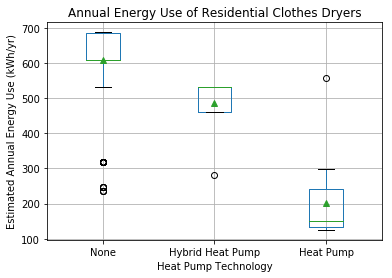

In [8]:
boxplot = df2.boxplot(column=['None', 'Hybrid Heat Pump', 'Heat Pump'], showmeans=True)
plt.title("Annual Energy Use of Residential Clothes Dryers")
plt.xlabel("Heat Pump Technology")
plt.ylabel("Estimated Annual Energy Use (kWh/yr)")
plt.show()

#### **Verdict**: Heat pump technology leads to a drastic decrease in energy consumption from clothes dryer use


Recently, manufacturers have been adopting heat pump systems in their clothes dryer design. In a heat pump system, hot air absorbs water from the laundry and is then passed through an evaporator that removes the water and stores it in a reservoir. The air is reheated and recirculated through the drum and evaporator until the laundry is dry. This system is efficient and requires less energy due to the recirculation of air, so running each load of laundry is better for the environment. 

*Of the clothes dryers certified by EnergySTAR, traditional styles use an average of 607 kWh of energy annually, whereas dryers equipped with heat pump systems use 201 kWh (67% decrease)*